In [1]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import networkx as nx
import tsplib95
import time
import pandas as pd

In [2]:
problem_names = ["ulysses16", "att48", "bier127", "gr202"]
best_costs = [6859, 10628, 118282, 40160]

problems = [tsplib95.load(f"tsp_problems/{name}.tsp") for name in problem_names]
graphs = [problem.get_graph() for problem in problems]

for i, graph in enumerate(graphs):
    # remove self loops
    graph.remove_edges_from(nx.selfloop_edges(graph))
    # rename nodes to start from 0
    graph = nx.relabel_nodes(graph, {node: node-1 for node in graph.nodes})
    graphs[i] = graph
    print(f"Nodes in graph {problem_names[i]}:", len(graph.nodes))

Nodes in graph ulysses16: 16
Nodes in graph att48: 48
Nodes in graph bier127: 127
Nodes in graph gr202: 202


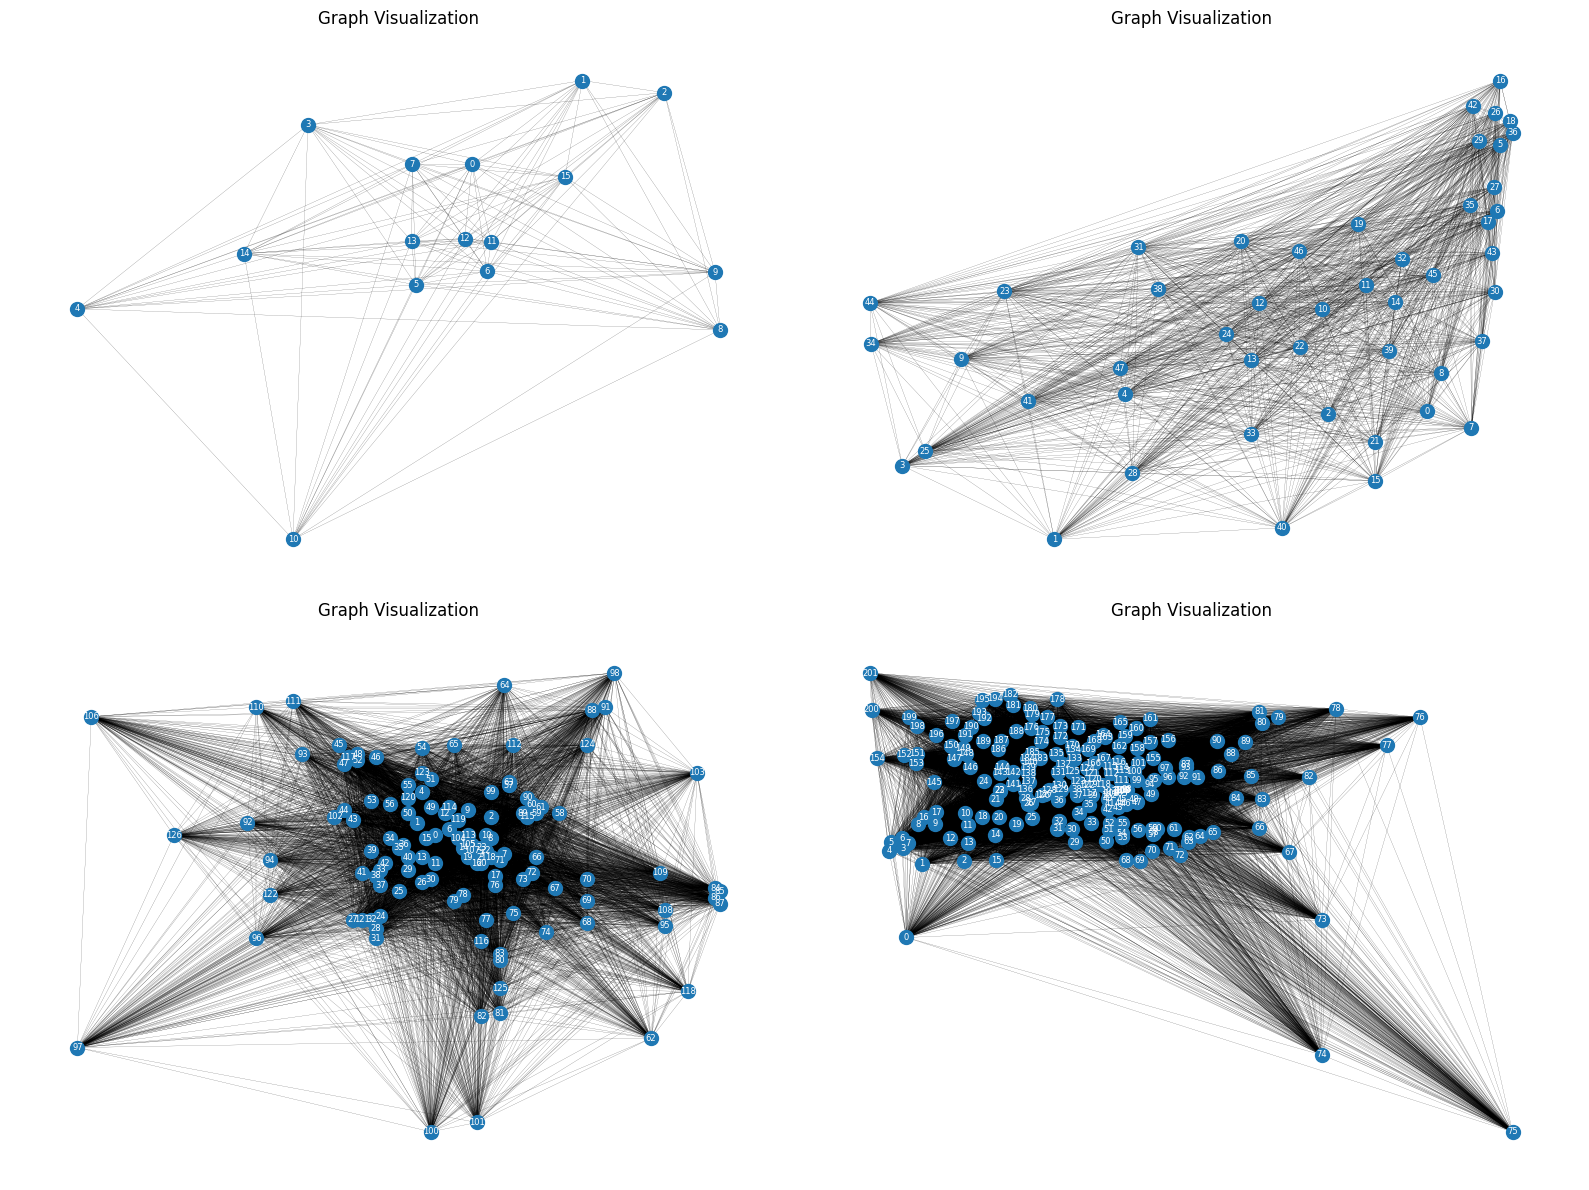

In [3]:
plt.figure(figsize=(16, 12))
for i, graph in enumerate(graphs):
    ax = plt.subplot(2, 2, i+1)
    ax.set_title(f"Problem {problem_names[i]}")
    get_graph_image(graph, ax)
plt.tight_layout()
plt.show()

In [4]:
heuristic_costs = []
for i, graph in enumerate(graphs):
    print(f"Problem {problem_names[i]}")
    print("Optimal cost:", best_costs[i])
    path, cost = min_path_cost(graph)
    print("Min heuristic tour cost:", cost)
    print()
    heuristic_costs.append(cost)

Problem ulysses16
Optimal cost: 6859
Min heuristic tour cost: 8225

Problem att48
Optimal cost: 10628
Min heuristic tour cost: 12918

Problem bier127
Optimal cost: 118282
Min heuristic tour cost: 135737

Problem gr202
Optimal cost: 40160
Min heuristic tour cost: 49961



## Analysis of the ulysses16 problem

In [5]:
prob = 0
mean_distance = 0
n = len(graphs[prob].nodes)
for i in range(n):
    neighbours = get_neighbours(graphs[prob], i)
    mean_distance += np.mean([graphs[prob][i][n]['weight'] for n in neighbours])
    
print(mean_distance)
mean_edge = mean_distance/n
print(mean_edge)

13028.266666666666
814.2666666666667


In [34]:
alpha_interval = np.linspace(0.5, 3.5, 7).tolist()
beta_interval = np.linspace(.5, 3.5, 7).tolist()
alpha_rate = 0.95
beta_rate = 1.05
rho_interval = np.linspace(0.7, 0.9, 3).tolist()
rate_interval = np.linspace(10, 30, 3).tolist()

# column names for the dataframe
columns = ["iter", "rate", "rho", "alpha", "beta", "cost", "time", "i"]
# create a dataframe to store the results
df = pd.DataFrame(columns=columns)

i = 0
histories = []
for iteration in range(1):
    #for rate in rate_interval:
        #for rho in rho_interval:
    for alpha in alpha_interval:
        for beta in beta_interval:
            print(f"Benchmark with: rate: {rate}, rho: {rho}, alpha: {alpha}, beta: {beta}")
            # run the algorithm for 
            n = len(graphs[prob].nodes)
            start = time.time()
            tsp = TSP(graphs[prob], alpha=alpha, beta=beta, alpha_rate=alpha_rate , beta_rate=beta_rate, rate=10, rho=0.8, max_iter=1000, k=int(np.sqrt(n)), heuristic_cost=heuristic_costs[prob], norm=heuristic_costs[prob]/mean_edge, opt=False)
            path = tsp.solve()
            cost_not_opt = path.cost
            path.opt_alg()
            cost_opt = path.cost
            end = time.time()
            dictionary = {"iter":iteration, "rate": rate, "rho": rho, "alpha": alpha, "beta": beta, "cost": cost, "time": end-start, "i": i}
            df = df._append(dictionary, ignore_index=True)
            histories.append(tsp.history)
            i+=1

Benchmark with: rate: 20.0, rho: 0.8, alpha: 0.5, beta: 0.5


/var/folders/tp/vfdk9pcj66g2trgt19fh08480000gn/T/ipykernel_37130/4061251385.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(dictionary, ignore_index=True)


Benchmark with: rate: 20.0, rho: 0.8, alpha: 0.5, beta: 1.0
Benchmark with: rate: 20.0, rho: 0.8, alpha: 0.5, beta: 1.5
Benchmark with: rate: 20.0, rho: 0.8, alpha: 0.5, beta: 2.0
Benchmark with: rate: 20.0, rho: 0.8, alpha: 0.5, beta: 2.5
Benchmark with: rate: 20.0, rho: 0.8, alpha: 0.5, beta: 3.0
Benchmark with: rate: 20.0, rho: 0.8, alpha: 0.5, beta: 3.5
Benchmark with: rate: 20.0, rho: 0.8, alpha: 1.0, beta: 0.5
Benchmark with: rate: 20.0, rho: 0.8, alpha: 1.0, beta: 1.0
Benchmark with: rate: 20.0, rho: 0.8, alpha: 1.0, beta: 1.5
Benchmark with: rate: 20.0, rho: 0.8, alpha: 1.0, beta: 2.0
Benchmark with: rate: 20.0, rho: 0.8, alpha: 1.0, beta: 2.5
Benchmark with: rate: 20.0, rho: 0.8, alpha: 1.0, beta: 3.0
Benchmark with: rate: 20.0, rho: 0.8, alpha: 1.0, beta: 3.5
Benchmark with: rate: 20.0, rho: 0.8, alpha: 1.5, beta: 0.5
Benchmark with: rate: 20.0, rho: 0.8, alpha: 1.5, beta: 1.0
Benchmark with: rate: 20.0, rho: 0.8, alpha: 1.5, beta: 1.5
Benchmark with: rate: 20.0, rho: 0.8, al

In [52]:
a = df['cost'].argmin()
a=6
df[a:a+2]

,iter,rate,rho,alpha,beta,cost,time,i
6,0.0,20.0,0.8,0.5,3.5,6859.0,1.927401,6.0
7,0.0,20.0,0.8,1.0,0.5,6982.0,1.984549,7.0


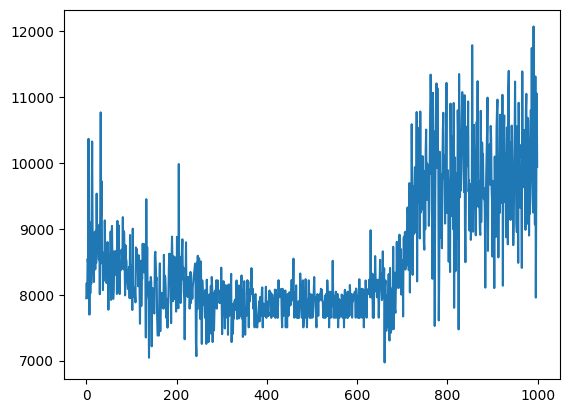

In [51]:
plt.plot(histories[6])

In [ ]:
df.to_csv("results_ulysses.csv", index=False)